In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
random_state=0

In [2]:
data= pd.read_csv('auto-mpg.csv')


In [3]:
# convert a feature to categorical
data['carname'] = data['carname'].astype('category')
data["carname"] = data["carname"].cat.codes

In [4]:
data.head()

,mpg,cylinders,displacement,hp,weight,acc,year,carname
0,18.0,8,307.0,130,3504,12.0,70,41
1,15.0,8,350.0,165,3693,11.5,70,26
2,18.0,8,318.0,150,3436,11.0,70,166
3,16.0,8,304.0,150,3433,12.0,70,13
4,17.0,8,302.0,140,3449,10.5,70,125


# Feature Selection

In [5]:

# separate the features and the target variable
X = data.iloc[:, 1:] # select all columns except the first one as features
y = data.iloc[:, 0] # select the first column as the target variable

# calculate the correlation matrix
corr_matrix = X.corrwith(y)

# sort the features by correlation with the target variable
sorted_features = corr_matrix.abs().sort_values(ascending=False)

# select the top k features
k = 5 
selected_features = sorted_features[:k].index.tolist()

# create a new dataframe with the selected features and the target variable
df = data[[y.name] + selected_features]

# separate the selected features and the target variable
X = df.iloc[:, 1:] # select all columns except the first one as features
y = df.iloc[:, 0] # select the first column as the target variable


In [6]:
df

,mpg,weight,displacement,hp,cylinders,year
0,18.0,3504,307.0,130,8,70
1,15.0,3693,350.0,165,8,70
2,18.0,3436,318.0,150,8,70
3,16.0,3433,304.0,150,8,70
4,17.0,3449,302.0,140,8,70
...,...,...,...,...,...,...
387,27.0,2790,140.0,86,4,82
388,44.0,2130,97.0,52,4,82
389,32.0,2295,135.0,84,4,82
390,28.0,2625,120.0,79,4,82


In [7]:
X

,weight,displacement,hp,cylinders,year
0,3504,307.0,130,8,70
1,3693,350.0,165,8,70
2,3436,318.0,150,8,70
3,3433,304.0,150,8,70
4,3449,302.0,140,8,70
...,...,...,...,...,...
387,2790,140.0,86,4,82
388,2130,97.0,52,4,82
389,2295,135.0,84,4,82
390,2625,120.0,79,4,82


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)


# Random Forest

In [9]:
ranf = RandomForestRegressor(random_state=0)
rf= ranf.fit(X_train,y_train)
scores_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores_rf
print(np.mean(scores_rf))

y_pred_rf = cross_val_predict(ranf, X_test,y_test)
scores_test_rf= cross_val_score(ranf, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_rf))

-8.420076206021637
-7.556425249999998


# Decision Tree

In [10]:
#Decision Tree
dectree = DecisionTreeRegressor(random_state = 0)
dt= dectree.fit(X_train,y_train)
scores_dt= cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print(np.mean(scores_dt))

y_pred_dt = cross_val_predict(dectree, X_test,y_test)
scores_test_dt= cross_val_score(dectree, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_dt))

-15.650972782258066
-16.07926785714286


# KNN

In [11]:
# Instance and fit
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
y_pred_knn = cross_val_predict(knn_model, X_test,y_test)
scores_test_knn= cross_val_score(knn_model, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
print(np.mean(scores_test_knn))


-20.03147


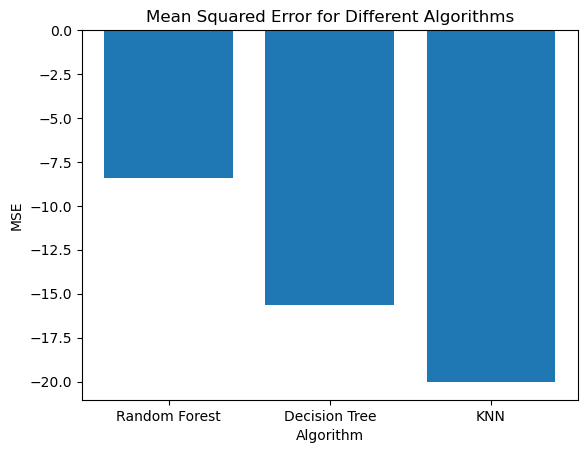

In [12]:
# calculate MSE for each algorithm
mse_values = {}

# Random Forest
ranf = RandomForestRegressor(random_state=0)
rf= ranf.fit(X_train,y_train)
scores_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse_values['Random Forest'] = np.mean(scores_rf)

# Decision Tree
dectree = DecisionTreeRegressor(random_state = 0)
dt= dectree.fit(X_train,y_train)
scores_dt= cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
mse_values['Decision Tree'] = np.mean(scores_dt)

# KNN
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
scores_knn= cross_val_score(knn_model, X_test, y_test,scoring='neg_mean_squared_error',cv=10)
mse_values['KNN'] = np.mean(scores_knn)

# create bar plot
fig, ax = plt.subplots()
ax.bar(mse_values.keys(), mse_values.values())
ax.set_xlabel('Algorithm')
ax.set_ylabel('MSE')
ax.set_title('Mean Squared Error for Different Algorithms')
plt.show()


# Proposed Algorithm

In [13]:
# create 10 categories with labels 1 to 10
X['displacement'] = pd.qcut(X['displacement'], q=10, labels=range(1, 11))



In [14]:
# create 10 categories with labels 1 to 10
X['year'] = pd.qcut(X['year'], q=10, labels=range(1, 11), duplicates='drop')


In [15]:
X['weight'] = pd.qcut(X['weight'], q=10, labels=range(1, 11), duplicates='drop')


In [16]:
# create 10 categories with labels 1 to 10
X['hp'] = pd.qcut(X['hp'], q=10, labels=range(1, 11),duplicates='drop')

In [17]:
X

,weight,displacement,hp,cylinders,year
0,8,9,8,8,1
1,8,9,10,8,1
2,8,9,9,8,1
3,8,8,9,8,1
4,8,8,8,8,1
...,...,...,...,...,...
387,5,5,4,4,10
388,2,2,1,4,10
389,3,5,4,4,10
390,5,4,3,4,10


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.20,random_state=0)


In [19]:
def add_mean_columns(X_train, X_test, y_train):
    
    # Iterate over each column in X_train
    for column in X_train.columns:

        

        # Find the unique values in the column
        unique_values = X_train[column].unique()

        # Calculate the mean for each unique value using y_train
        means = {}
        for value in unique_values:
            means[value] = y_train[X_train[column] == value].mean()

        # Replace the column in X_train with the corresponding means
        X_train[column] = X_train[column].apply(lambda x: means[x])

        # Replace the column in X_test with the corresponding means
        X_test[column] = X_test[column].apply(lambda x: means[x] if x in means else x)

        # Check for unique values in X_test that are not in X_train
        missing_values = set(X_test[column].unique()) - set(X_train[column].unique())
        if missing_values:
            print(f"Warning: Unique values {missing_values} in {column} of X_test not found in X_train.")

    return X_train, X_test

In [20]:
X_train_new, X_test_new = add_mean_columns(X_train, X_test, y_train)

In [21]:
X_test = X_test_new
X_train = X_train_new

In [22]:
X_train

,weight,displacement,hp,cylinders,year
218,33.122581,32.750000,30.426923,29.336709,23.659091
254,17.629412,21.086111,21.531707,19.775362,23.562069
299,28.551613,30.728571,30.426923,29.336709,28.627907
191,22.693333,21.086111,25.997436,19.775362,21.903226
56,28.551613,25.355556,21.531707,29.336709,18.900000
...,...,...,...,...,...
323,32.841935,32.750000,34.123077,29.336709,28.627907
192,22.693333,18.503333,25.000000,19.775362,21.903226
117,28.551613,25.355556,28.446154,29.336709,16.757576
47,19.406061,18.503333,25.997436,19.775362,19.372093


In [23]:
def prop_reg(X_test,X_train,y_train,y_test,kappa):
    d = np.zeros((len(X_test),len(X_train)))
    for i in range(len(X_test)):
        for j in range(len(X_train)):
            d[i,j] = np.linalg.norm(X_test[i]-X_train[j])
    c=np.zeros(len(y_test))
    for i in range(len(y_test)):
        l=0
        v=0
        for j in range(len(y_train)):
            
            l+=y_train[j]/((1+d[i,j])**kappa)
            v+=1/((1+d[i,j])**kappa)
        
        c[i]=l/v
    return(c)

kappa = 1.000, avg MSE = 34.551
kappa = 2.000, avg MSE = 16.882
kappa = 3.000, avg MSE = 10.961
kappa = 4.000, avg MSE = 9.481
kappa = 5.000, avg MSE = 9.177
kappa = 6.000, avg MSE = 9.207
kappa = 7.000, avg MSE = 9.360
kappa = 8.000, avg MSE = 9.559
kappa = 9.000, avg MSE = 9.771


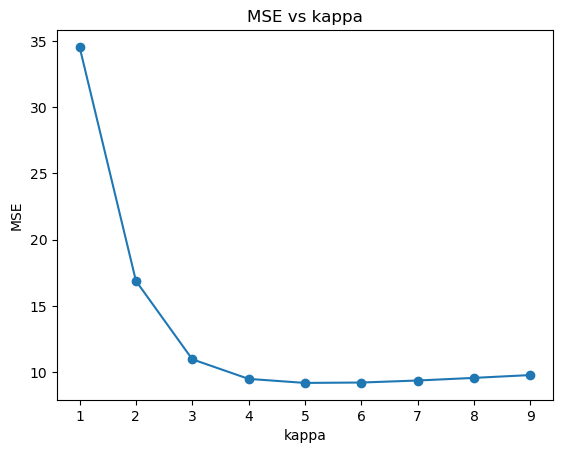

In [24]:
kf = KFold(n_splits=10)
kappa_values = np.array([1,2,3,4,5,6,7,8,9])
mse_values = []

for kappa in kappa_values:
    mse = 0.0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        y_pred = prop_reg(X_test, X_train, y_train, y_test, kappa)
        mse += mean_squared_error(y_test, y_pred)
    mse /= kf.get_n_splits(X)
    mse_values.append(mse)
    print(f"kappa = {kappa:.3f}, avg MSE = {mse:.3f}")

# plot the MSE vs kappa curve
plt.plot(kappa_values, mse_values, '-o')
plt.xlabel('kappa')
plt.ylabel('MSE')
plt.title('MSE vs kappa')
plt.show()

In [25]:
# find the index of the minimum MSE value
min_index = np.argmin(mse_values)

# print the minimum MSE value and the corresponding kappa value
print(f"Minimum MSE: {mse_values[min_index]:.3f}, Kappa value: {kappa_values[min_index]}")


Minimum MSE: 9.177, Kappa value: 5


Text(0.5, -0.4, 'Bar Graph showing the MSE for different algorithms')

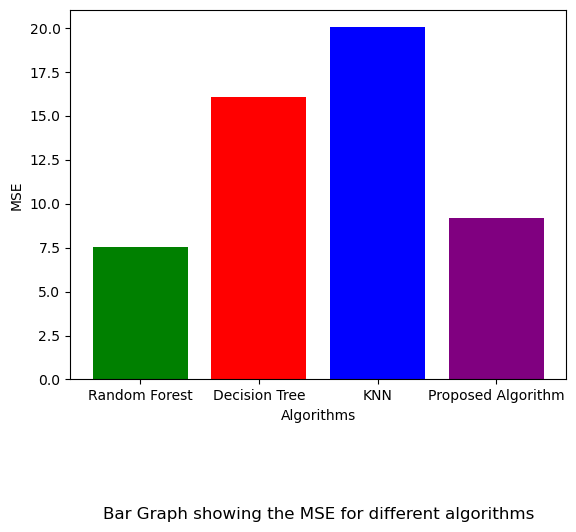

In [26]:

values = [7.56, 16.08,20.03,9.177]
labels = ['Random Forest', 'Decision Tree', 'KNN','Proposed Algorithm']
fig, ax = plt.subplots()
ax.bar(labels, values, color=['green','red','blue','purple'])

# add labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('MSE')
ax.set_title('Bar Graph showing the MSE for different algorithms', loc='center', y=-0.4)
